<a href="https://colab.research.google.com/github/mahdaviFarAsr/activity/blob/reg_mlp/mlp_regression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [8]:
houses = fetch_california_housing()
xTrain, xTest, yTrain, yTest = train_test_split(houses.data, houses.target)
xTrain, xValid, yTrain, yValid = train_test_split(xTrain, yTrain)
print(xTrain.shape, yTrain.dtype)

(11610, 8) float64


In [ ]:
# print(xTrain, yTrain)

In [ ]:
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)
xValid = scaler.transform(xValid)
# print(xTrain)
# print(xTest)

In [12]:
from numpy.ma.core import shape
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu" , input_shape = xTrain.shape[1:]),
keras.layers.Dense(1)])

In [13]:
model.compile(loss = "mean_squared_error", optimizer = "sgd")

In [ ]:
history = model.fit(xTrain, yTrain, epochs = 20, validation_data=(xValid, yValid))

In [22]:
evaluateModel = model.evaluate(xTest, yTest)

162/162 [==============================] - 0s 2ms/step - loss: 1.3194


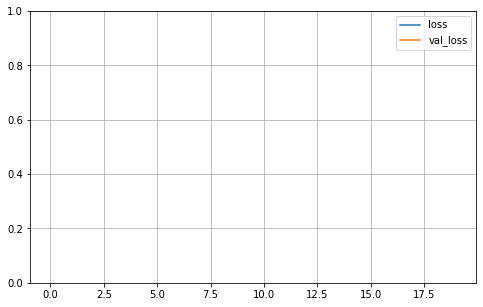

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()